# 適応正則化分類
学習データが1つずつ入ってくるオンライン学習での分類問題．  
パラメータの平均μ，分散Σを更新することで適応的にパラメータを更新していく．  

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# データ生成
def data_generate(n=50, random_state=0):
    np.random.seed(random_state)
    x = np.random.randn(n, 3)
    x[:n // 2, 0] -= 15
    x[n // 2:, 0] -= 5
    x[1:3, 0] += 10
    x[:, 2] = 1
    y = np.concatenate((np.ones(n // 2), -np.ones(n // 2)))
    index = np.random.permutation(np.arange(n))
    return x[index], y[index]

In [3]:
def ada_reg(x, y, n, iteration, gamma, lr, random_state=0):
    np.random.seed(random_state)
    mu = np.random.randn(3)
    sigma = np.random.randn(3,3)
    for _ in range(iteration):
        idx = np.random.randint(0, n)
        
        #平均ベクトルの計算
        tmp1 = y[idx] * np.maximum(0, 1-np.dot(mu.T,x[idx])*y[idx])
        tmp2 = np.dot(x[idx].T, np.dot(sigma,x[idx])) + gamma
        mu += tmp1*np.dot(sigma,x[idx])/tmp2
        #print(mu)
        
        #分散共分散行列の計算
        tmp3 = np.dot(np.dot(sigma,x[idx])[:,None],np.dot(x[idx],sigma)[:,None].T)
        sigma -= tmp3/tmp2
        #print(sigma)
        
    return mu, sigma

In [4]:
#プロット
def visualize(x, y, w):
    plt.clf()
    plt.xlim(-20, 0)
    plt.ylim(-3, 3)
    plt.scatter(x[y == 1][:,0], x[y == 1][:,1], c='blue')
    plt.scatter(x[y == -1][:,0], x[y == -1][:,1], c='red')
    plt.plot([-20,0], -(w[2] + np.array([-20, 0]) * w[0]) / w[1])
    #plt.savefig('lecture8.png')
    plt.show()

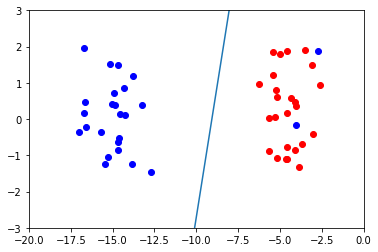

In [6]:
#実行セル
n = 50 #サンプル数
gamma = 10 #正則化パラメータ
lr = 0.01 #学習率
iter_num = n*100 #繰り返し回数

x, y = data_generate(random_state=0)
mu, sigma = ada_reg(x, y, n, iter_num, gamma, lr, random_state=0)
visualize(x,y,mu)

50個のデータに対して5000回更新を行ったところ，ノイズを含んだデータ分布でも正しく分類境界が引けていることがわかる．